In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
df = pd.read_csv("dataset - netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [306]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [308]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [309]:
#Standardize data

In [310]:
c=df.columns
for i in c:
    df[i] = df[i].replace('Not Given', pd.NA)
    print(i,'OK')
    

show_id OK
type OK
title OK
director OK
country OK
date_added OK
release_year OK
rating OK
duration OK
listed_in OK


In [311]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

Text(0.5, 1.0, 'Finding the distribution of null value')

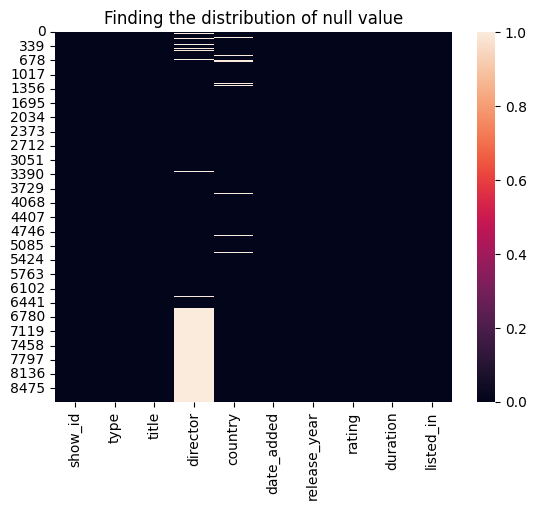

In [312]:
#we use heatmap to visualise nullvalue
sns.heatmap(df.isnull())
plt.title("Finding the distribution of null value")

In [313]:
#we drop director cause it has 2588 null value
df = df.drop('director',axis = 1 )

In [314]:
#fill country null value with mode of year
df['country'] = df.country.fillna(df['country'].mode()[0])

In [315]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [296]:
#add more features

In [316]:
df["years_added"] = df['date_added'].apply(lambda x : x.split('/')[-1])

In [317]:
df['years_added'] = pd.to_numeric(df['years_added'])

In [318]:
df[['type', 'title', 'country', 'date_added',
        'rating', 'duration', 'listed_in']].describe().T

,count,unique,top,freq
type,8790,2,Movie,6126
title,8790,8787,9-Feb,2
country,8790,85,United States,3527
date_added,8790,1713,1/1/2020,110
rating,8790,14,TV-MA,3205
duration,8790,220,1 Season,1791
listed_in,8790,513,"Dramas, International Movies",362


In [319]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [320]:
df.to_csv("Output/Cleaned_dataset.csv",index = False)